In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree

In [2]:
column_names = ['name_of_surface_type', 'name_of_active_site_type']
for i in range(1,61):
    column_names.append('element_of_atom_'+str(i))
    column_names.append('CN_of_atom_'+str(i))
column_names.append('adsorption_energy')
data = pd.read_csv('journal_data/data.csv', names=column_names, header=None)

In [3]:
X_df = data.iloc[:, 0:122]
y_df = data.iloc[:, 122]

In [4]:
X_df = pd.get_dummies(X_df, columns=["name_of_surface_type", "name_of_active_site_type"]).astype(int)

In [5]:
X_array = X_df.to_numpy()
y_array = y_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Create an instance of the DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5)

# Train the model using the training data
grid_search.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred = grid_search.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Mean Absolute Error: 0.10693829811939384
Root Mean Squared Error: 0.14947059574774216
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_split': 10}


In [7]:
# Fit the best model using the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Use the best model to predict the test data
y_pred = best_model.predict(X_test)

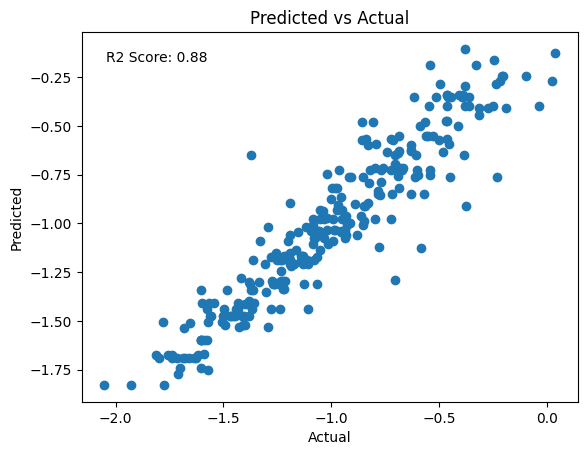

In [8]:
# Plot the predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Add the R2 score as a text annotation
plt.text(0.05, 0.95, f'R2 Score: {r2:.2f}', transform=plt.gca().transAxes, ha='left', va='top')

plt.show()


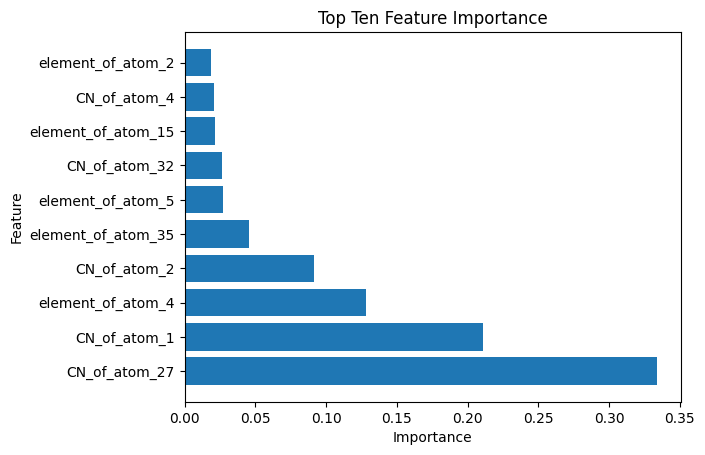

In [9]:
# Get the feature importances
importances = best_model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_df.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top ten important features
top_ten_features = feature_importances.head(10)

# Plot the top ten feature importances
plt.barh(top_ten_features['Feature'], top_ten_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Ten Feature Importance')

plt.show()

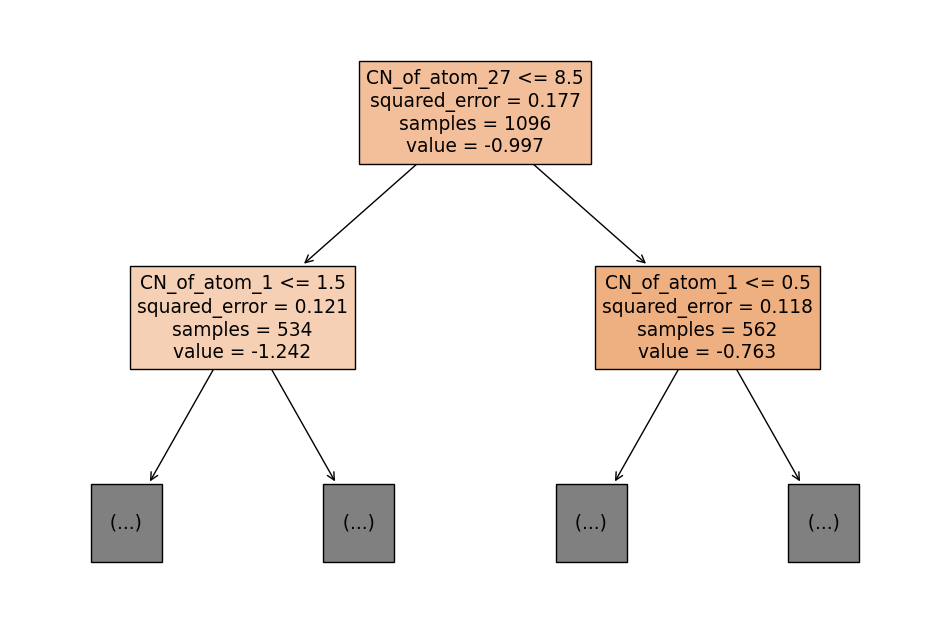

In [11]:
# Plot the tree diagram with top 5 layers
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=X_df.columns, filled=True, max_depth=1)
plt.show()